In [1]:
import numpy as np
import pandas as pd

In [7]:
red_df = pd.read_csv('data/winequality-red.csv', delimiter=";")
white_df = pd.read_csv('data/winequality-white.csv', delimiter = ';')

red_df.head()
red_df.info()
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [8]:
red_df.insert(0, column='type', value='red')
white_df.insert(0, column='type', value='white')

# 데이터 탐색하기
- 기본정보 확인
- wine 데이터셋 필드 
- type                  : 와인 타입(red, white)
- fixed acidity         : 결합산 - 주로 타르타산(tartaric), 사과산(malic)으로 구성, 와인의 산도 제어
- volatile acidity      : 휘발산 - 와인의 향과 연관
- citric acid           : 구연산 - 와인의 신선함을 올려주는 역할, 산성화에 연관을 미침
- residual sugar        : 잔여 설탕 - 화인의 단맛을 올여줌
- chlorides             : 염화물 - 화인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
- free sulfur dioxide   : 이산화 황 활성
- total sulfur dioxide  : 이산화 황 총량
- sulphates             : 황산염
- ** 황 화합물 : 황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 
    (free sulfur dioxide, total sulfur dioxide, sulphates)
- density               : 밀도 - 바디의 높고 낮음을 표현하는 와인의 무게감
- pH                    : 산성도 - 와인의 신맛의 정도를 나타냄
- alcohol               : 알코올 와인의
- quality    

In [12]:
red_df.head()
white_df.head()

wine = pd.concat([red_df, white_df], axis = 0)
wine.to_csv('data/wine_total.csv', index=False)

In [14]:
wine.columns = wine.columns.str.replace(' ', '')
wine.head()

,type,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
print(sorted(wine['quality'].unique()))

[3, 4, 5, 6, 7, 8, 9]


1. 와인의 type과 quality로 groupby 하여 alcohol의 평균을 구하라.
2. 와인의 quality로 groupby 하여 alcohol의 평균과 표준편차를 구하라.
3. 와인의 quality로 groupby 하여 alcohol의 [평균, 분산(var)], pH의 [증앙값(median)과 합]을 구하라.
4. 와인의 type과 quality로 groupby 하여 alcohol의 [평균과 중앙값(median)]을 구하라.

In [32]:
print(wine.groupby(by = ['type', 'quality'])['alcohol'].mean())
print(wine.groupby(by = 'quality')['alcohol'].agg(['mean', 'std']))
print(wine.groupby(by = 'quality').agg({'alcohol' : ['mean', 'var'], 'pH' : 'median'}))
print(wine.groupby(by= ['type', 'quality'])['alcohol'].agg(['mean', 'median']))

type   quality
red    3           9.955000
       4          10.265094
       5           9.899706
       6          10.629519
       7          11.465913
       8          12.094444
white  3          10.345000
       4          10.152454
       5           9.808840
       6          10.575372
       7          11.367936
       8          11.636000
       9          12.180000
Name: alcohol, dtype: float64
              mean       std
quality                     
3        10.215000  1.106497
4        10.180093  0.985923
5         9.837783  0.814416
6        10.587553  1.126491
7        11.386006  1.199337
8        11.678756  1.278921
9        12.180000  1.013410
           alcohol               pH
              mean       var median
quality                            
3        10.215000  1.224336  3.245
4        10.180093  0.972044  3.220
5         9.837783  0.663273  3.190
6        10.587553  1.268983  3.210
7        11.386006  1.438410  3.220
8        11.678756  1.635640  3.230
9     

# T검정과 회귀분석

- T 검정을 위해서 scipy 라이브러리 패키지 사용, 두 그룹 간 차이 비교
- 회귀분석 : statsmodel 라이브러리 패키지 사용

In [34]:
from scipy import stats
from statsmodels.formula.api import ols, glm

# 회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm 함수를 로드
# ols: 최소승자법 OLS: Ordinary Least Squares는 잔차제곱합(RSS: Residual Sum of Squares)를
# 최소화하는 가중치 벡터를 구하는 방법

In [39]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
print(red_wine_quality[:10])

white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']
print(white_wine_quality[:10])


0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: quality, dtype: int64


In [45]:
stats.ttest_ind(red_wine_quality, white_wine_quality)

Ttest_indResult(statistic=-9.685649554187696, pvalue=4.888069044201508e-22)

# 회귀분석

## 회귀분석 선형식 ( y = a1x1 + a2x2 + a3x3 + .... + anxn + c)
## Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol' 

In [56]:
Rformula = 'quality ~ fixedacidity + volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol'
regression_result = ols(Rformula, data = wine).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:21:26   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             55.7627     11.894      4.688      0.000      32.447      79.079
fixedacidity           0.0677      0.016      4.346      0.000       0.037       0.098
volatileacidity       -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citricacid            -0.1097      0.080     -1.377      0.168      -0.266       0.046
residualsugar          0.0436      0.005      8.449      0.000       0.033       0.054
chlorides             -0.4837      0.333     -1.454      0.146      -1.136       0.168
freesulfurdioxide      0.0060      0.001      7.948      0.000       0.004       0.007
totalsulfurdioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density              -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                     0.4393      0.090      4.861      0.000       0.262       0.616
sulphates              0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]

,alcohol,chlorides,citricacid,density,fixedacidity,freesulfurdioxide,pH,residualsugar,sulphates,totalsulfurdioxide,volatileacidity
0,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.99680,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.99700,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.99800,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,1.9,0.56,34.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...
4893,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,1.6,0.50,92.0,0.21
4894,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,8.0,0.46,168.0,0.32
4895,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,1.2,0.46,111.0,0.24
4896,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,1.1,0.38,110.0,0.29


In [58]:
sample1_predict = regression_result.predict(sample1)

In [62]:
print(sample1_predict[10:20])
print(wine['quality'][10:20])

10    4.967877
11    5.690760
12    5.263028
13    5.681714
14    5.184065
15    5.219619
16    5.925258
17    5.431179
18    5.033491
19    5.517900
dtype: float64
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
Name: quality, dtype: int64


In [76]:
data = {
    "fixedacidity" : [8.5, 8.1], 
    "volatileacidity":[0.8, 0.5],
    "citricacid":[0.3, 0.4], 
    "residualsugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "freesulfurdioxide":[30.0, 31.0], 
    "totalsulfurdioxide":[98.0,99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35],
    "alcohol":[9.0, 0.88]
    }

In [78]:
sample2= pd.DataFrame(data,columns=sample1.columns)
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

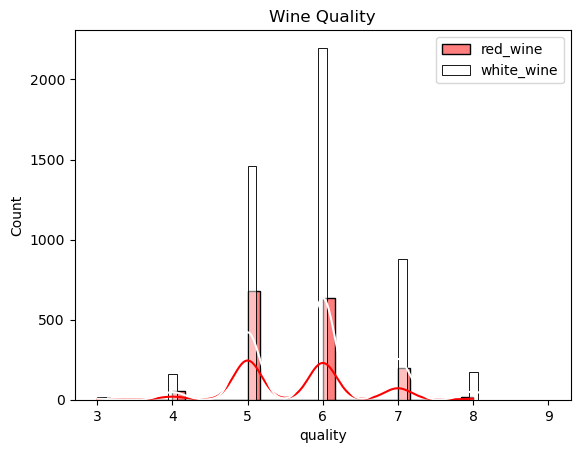

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = red_wine_quality, kde = True, color = 'red', label='red_wine')
sns.histplot(data = white_wine_quality, kde= True, color=  'white', label='white_wine')
plt.title('Wine Quality')
plt.legend()
plt.show()

# 부분 회귀 플롯으로 시각화하기
- 독립변수가 2개 이상인 경우 부분회귀플롯을 사용하여 하나의 독립변수가 종속변수에 미치는 영향력을 시각화하여 분석할 수 있음

- plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=Flase)

  - endog : 종속변수 문자열
  - exog_i : 분석 대상이 되는 독립변수 문자열
  - exog_others : 나머지 독립변수 문자열의 리스트
  - data : 모든 데이터가 있는 데이터프레임
  - obs_labels : 데이터 라벨링 여부
  - ret_coords : 진차 데이터 반환 여부

In [89]:
import statsmodels.api as sm

In [88]:
others = list(set(wine.columns).difference(set(['quality', 'fixedacidity'])))
others

['sulphates',
 'totalsulfurdioxide',
 'alcohol',
 'citricacid',
 'freesulfurdioxide',
 'chlorides',
 'residualsugar',
 'pH',
 'type',
 'density',
 'volatileacidity']

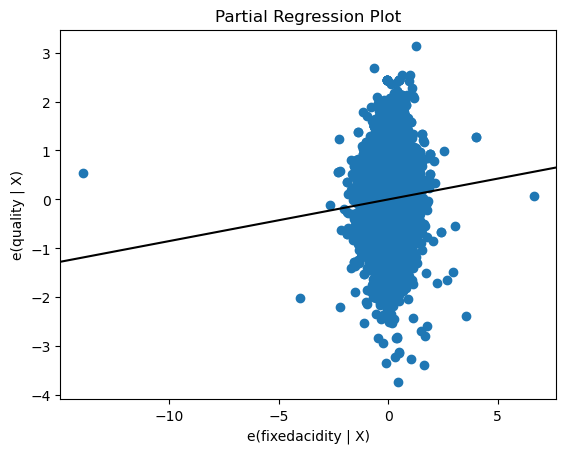

In [93]:
p, resids = sm.graphics.plot_partregress('quality', 'fixedacidity', others, data=wine, ret_coords=True, obs_labels=False)
plt.show()

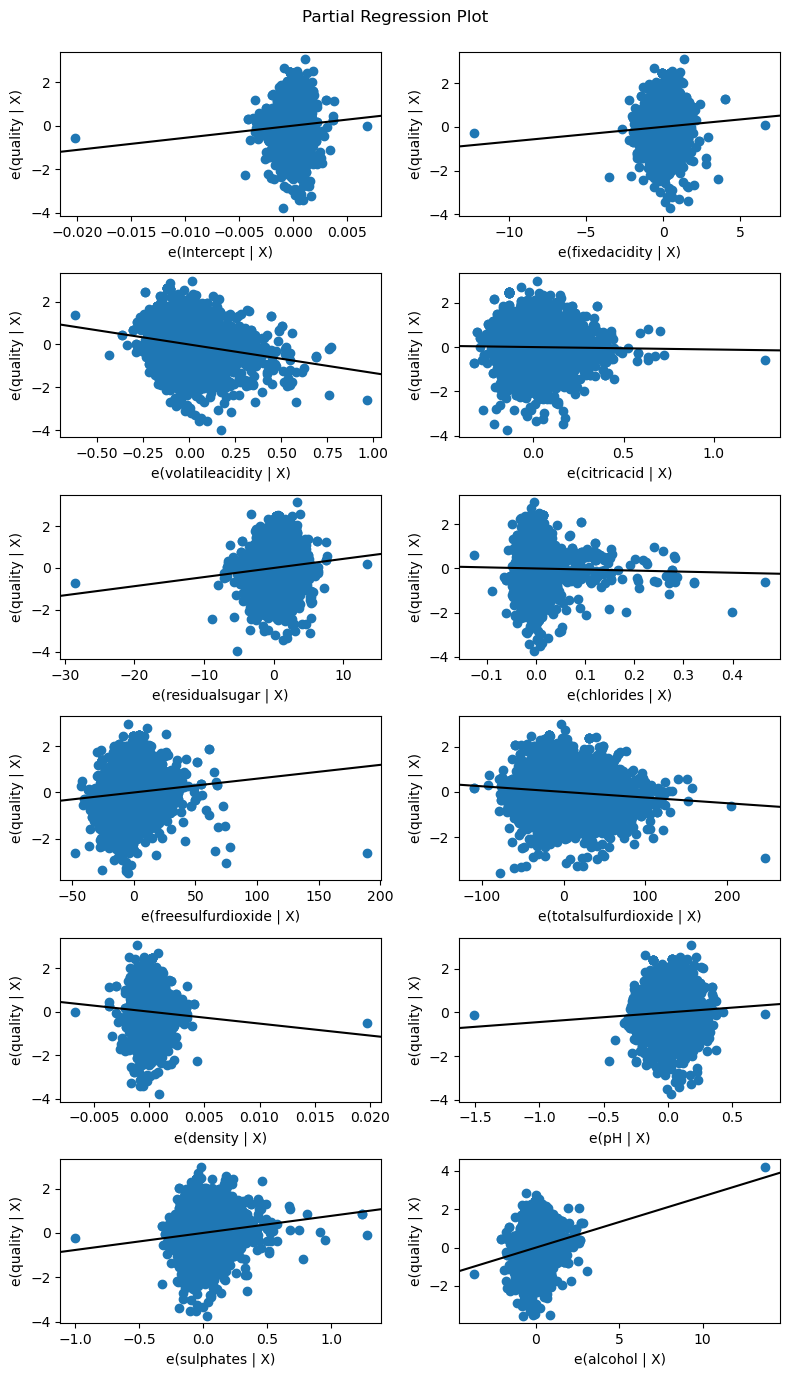

In [95]:
# 크기지정 #
fig = plt.figure(figsize = (8, 14))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()